Data profiling Before creating a machine learning model,understanding the dataset first 
doing data profiling to get a better data understanding for predicting the rent of a location using supervised machine learning
Group 4 data science



In [64]:
#Importing Data using pandas and assign it df
import pandas as pd
pd.set_option('display.max_columns',None)
df = pd.read_csv('House_Rent_Dataset.csv')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [65]:
#Showing how much data is inside the dataset using len() result is 4746
print("\nThe Length of The Data: ", len(df))


The Length of The Data:  4746


In [66]:
#Showing The Shape of The Data using .shape result is 4746 rows and 12 columns
print("\nThe Shape of The Data: ", df.shape)


The Shape of The Data:  (4746, 12)


In [67]:
#Showing The Information of The Data using the .info()
print("\nThe Information of The Data: ")
print(df.info())


The Information of The Data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB
None


In [68]:
#Showing The Statistical Calculations using the .describe()
print(df.describe(include= "all"))

         Posted On          BHK          Rent         Size       Floor  \
count         4746  4746.000000  4.746000e+03  4746.000000        4746   
unique          81          NaN           NaN          NaN         480   
top     2022-07-06          NaN           NaN          NaN  1 out of 2   
freq           311          NaN           NaN          NaN         379   
mean           NaN     2.083860  3.499345e+04   967.490729         NaN   
std            NaN     0.832256  7.810641e+04   634.202328         NaN   
min            NaN     1.000000  1.200000e+03    10.000000         NaN   
25%            NaN     2.000000  1.000000e+04   550.000000         NaN   
50%            NaN     2.000000  1.600000e+04   850.000000         NaN   
75%            NaN     3.000000  3.300000e+04  1200.000000         NaN   
max            NaN     6.000000  3.500000e+06  8000.000000         NaN   

         Area Type Area Locality    City Furnishing Status  Tenant Preferred  \
count         4746          474

In [69]:
#Showing The Unique Data from each column using function .nunique()
print("\nThe Unique Data: ")
print(df.nunique())


The Unique Data: 
Posted On              81
BHK                     6
Rent                  243
Size                  615
Floor                 480
Area Type               3
Area Locality        2235
City                    6
Furnishing Status       3
Tenant Preferred        3
Bathroom                8
Point of Contact        3
dtype: int64


Looking for a correlation of each data by visualizing it
using seaborn. matplotlib and Numpy

C:\Users\ochan\AppData\Local\Temp\ipykernel_31068\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

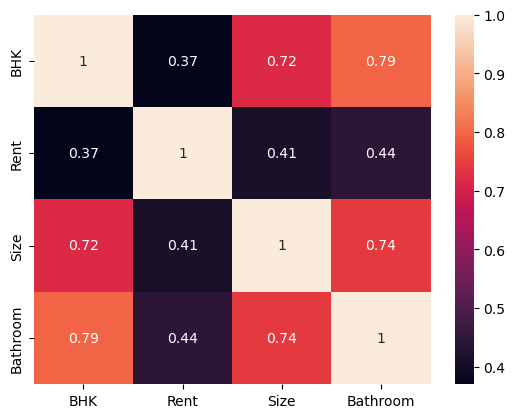

In [70]:
sns.heatmap(df.corr(), annot=True)

C:\Users\ochan\AppData\Local\Temp\ipykernel_31068\3958339886.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mask = np.triu(df.corr())
C:\Users\ochan\AppData\Local\Temp\ipykernel_31068\3958339886.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  h_map = sns.heatmap(df.corr(), mask=corr_mask, cmap='Blues')


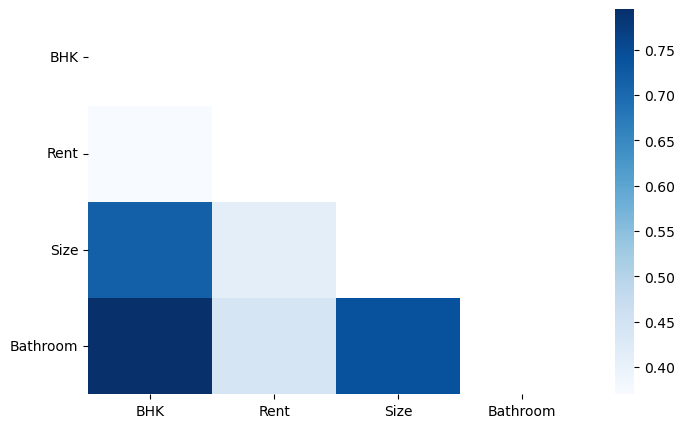

In [71]:
# looking for a correlation of each data by visualizing it. On this part, we are using Seaborn, Matplotlib and Numpy
#Looking For A Correlation
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
corr_mask = np.triu(df.corr())
h_map = sns.heatmap(df.corr(), mask=corr_mask, cmap='Blues')
plt.yticks(rotation=360)
plt.show()


Data cleansing before doing data cleansing we make a function called
data_outliers that receives parameters data and col

In [73]:
#Creating a function to remove the outliers
def data_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    data = data[~((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR)))]
    return data

In [75]:
#Looking For The Missing Value in Each Column
#the dataset has no missing values using isnull() and sum()
print(df.isnull().sum())

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64


checking the columns for a distribution of the data


Checking The rent Column


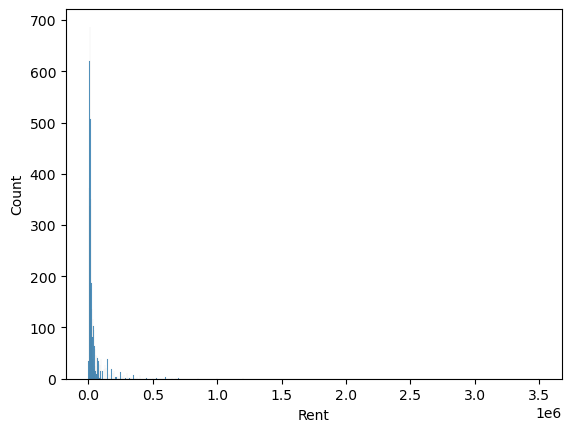

<Figure size 2000x500 with 0 Axes>

In [77]:
#Checking The Rent Column
print("\nChecking The rent Column")
sns.histplot(df['Rent'])
plt.figure(figsize=(20, 5))
plt.show()

In [ ]:
For sure the Rent column has outliers so to overcome these outliers, 
we delete them using the previous function that we named data_outliers

(4226, 12)


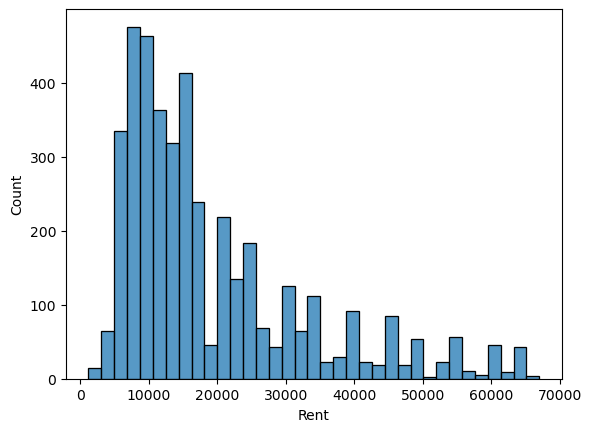

In [78]:
#After removing the outliers the data has 4226 rows and 12 columns as well.
df = data_outliers(df, 'Rent')
print(df.shape)
sns.histplot(df['Rent'])
plt.show()


Checking The Bathroom Column


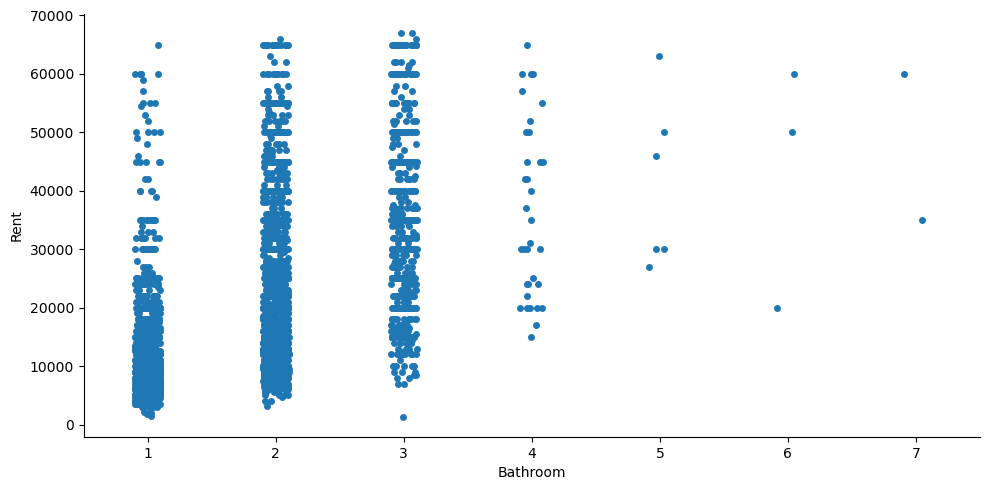

In [79]:
#Checking The Bathroom Column
print("\nChecking The Bathroom Column")
sns.catplot(x='Bathroom', y='Rent', data=df, height=5, aspect=2)
plt.show()

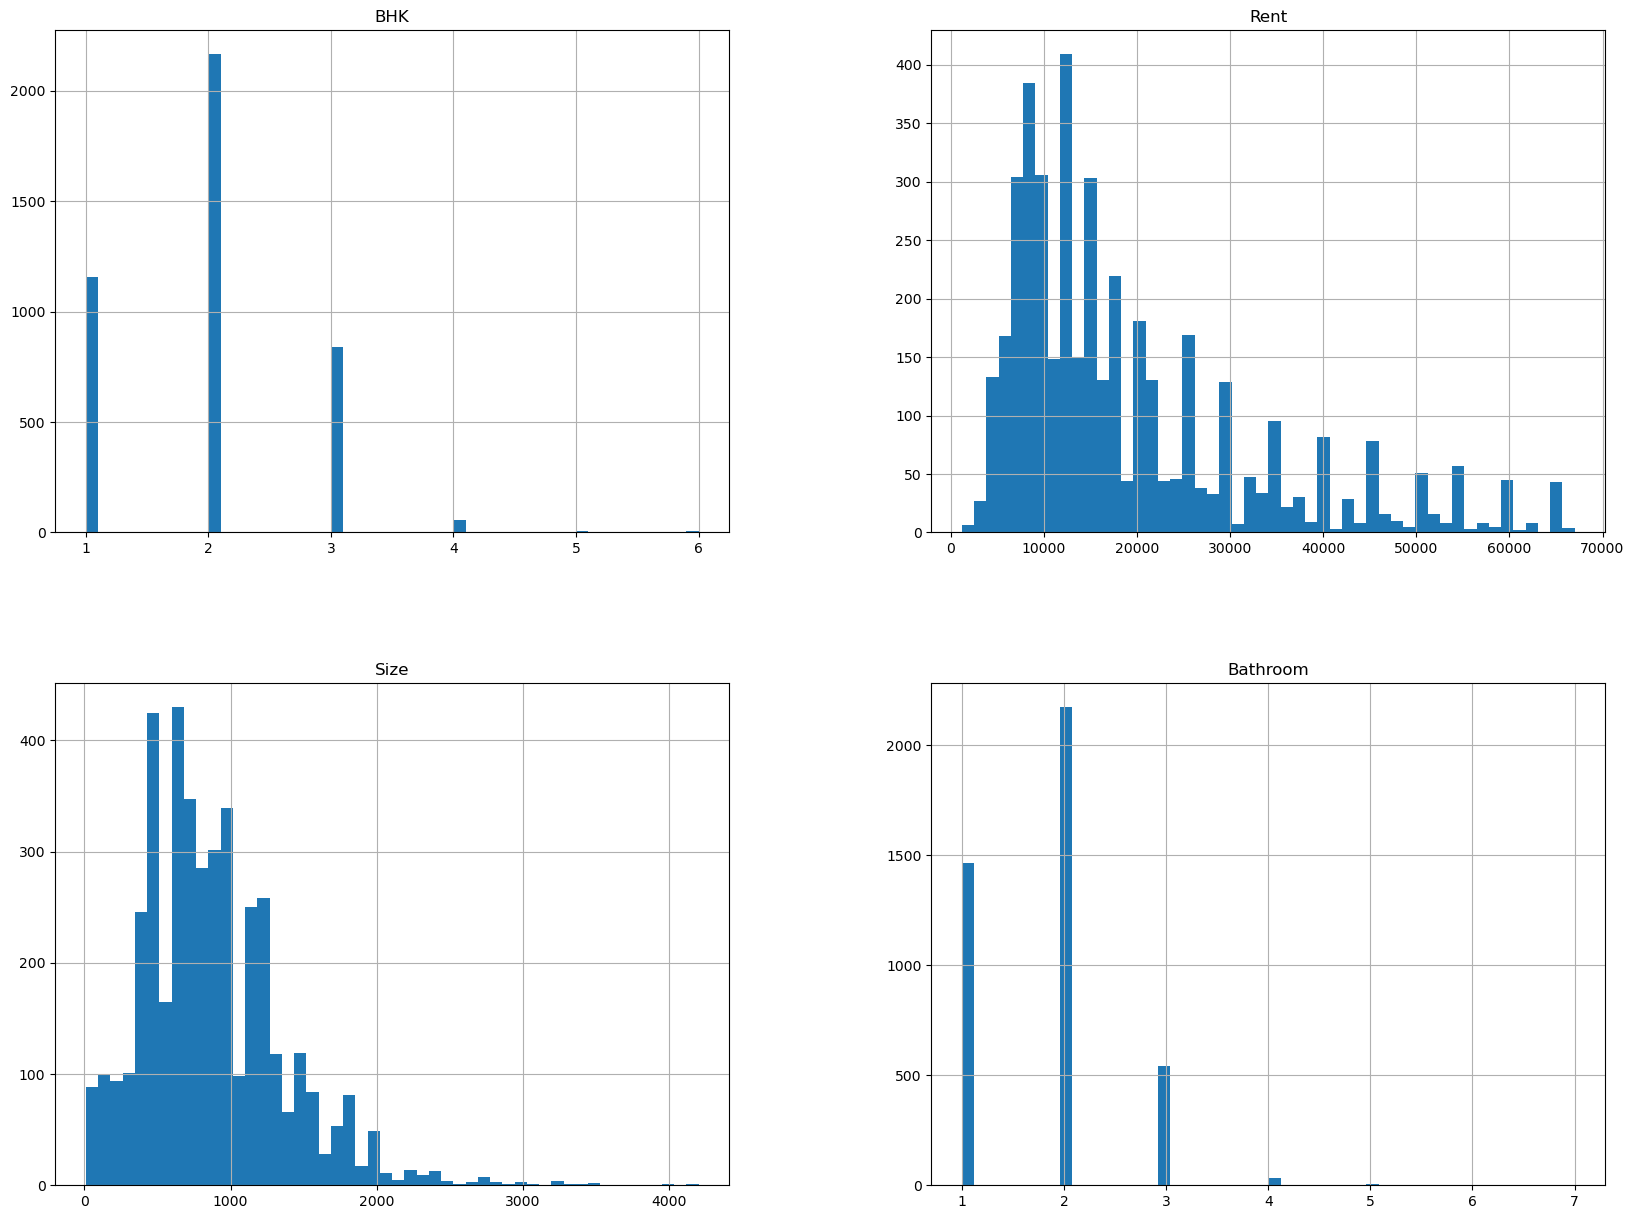

In [80]:
df.hist(bins=50, figsize=(20,15))
plt.show()

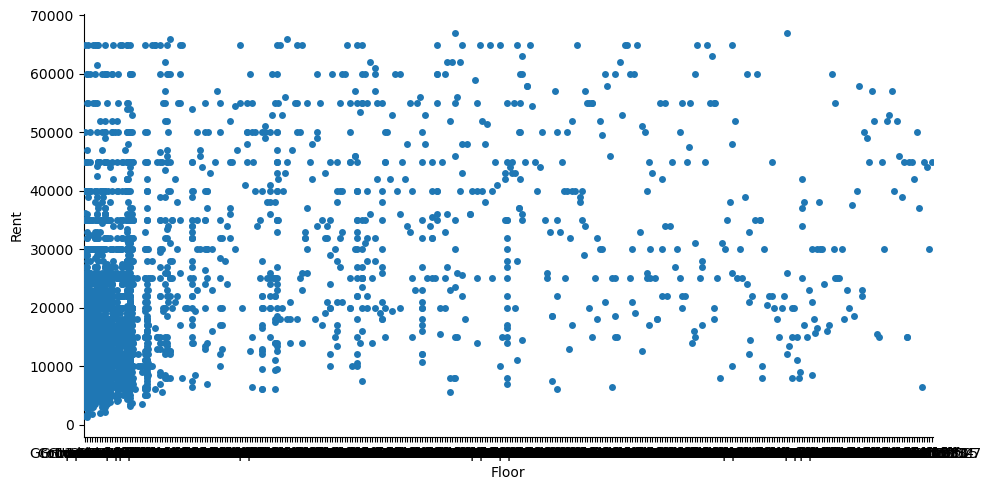

In [82]:
sns.catplot(x='Floor', y='Rent', data=df, height=5, aspect=2)
plt.show()

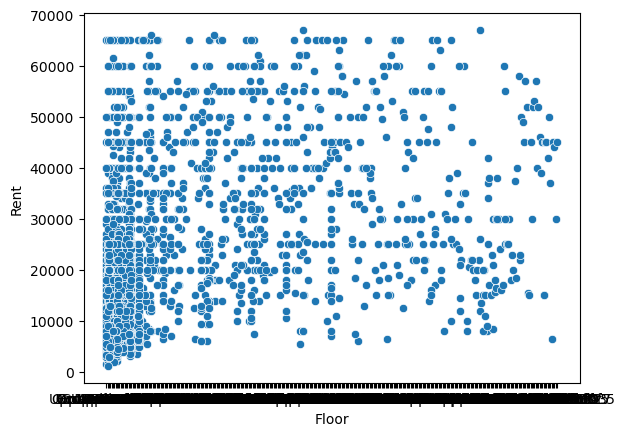

In [83]:
sns.scatterplot(x='Floor', y='Rent', data=df)
plt.show()

In [84]:
#Removing Duplicated Data
print("\nRemoving Duplicated Data")
df.drop_duplicates(inplace=True)
print('\nThe Shape of The Data After Removing The Duplicated Data: ', df.shape)


Removing Duplicated Data

The Shape of The Data After Removing The Duplicated Data:  (4226, 12)



Checking The Size Column


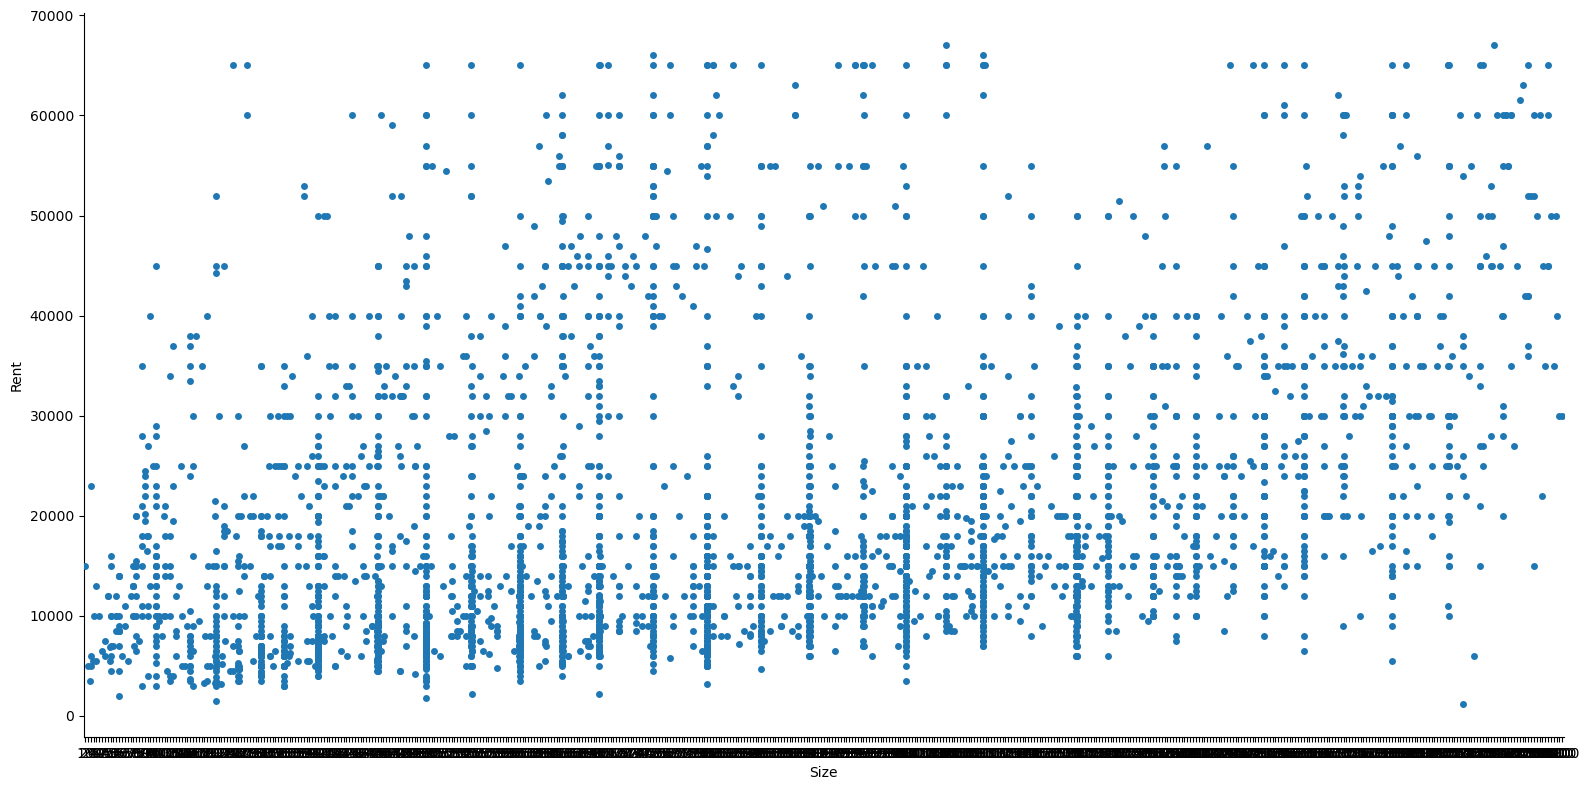

In [85]:
#Checking The Size Column
print("\nChecking The Size Column")
sns.catplot(x='Size', y='Rent', data=df, height=8, aspect=2)
plt.show()


Checking The BHK Column


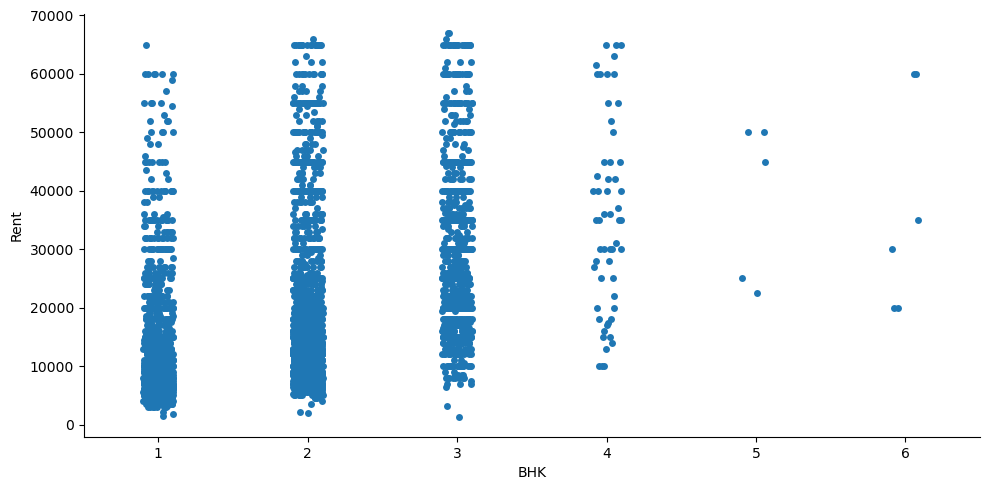

In [86]:
#Checking The BHK Column
print("\nChecking The BHK Column")
sns.catplot(x='BHK', y='Rent', data=df, height=5, aspect=2)
plt.show()


Checking The Bathroom Column


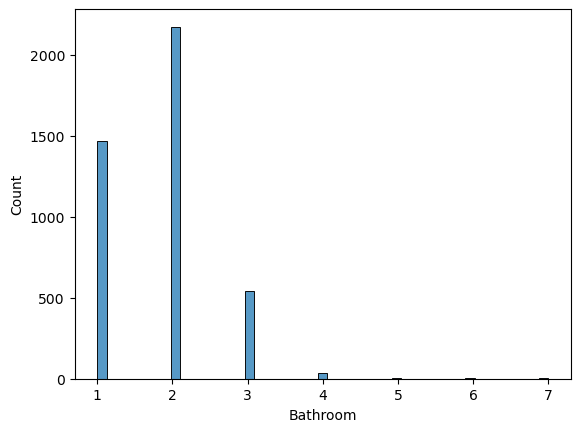

In [87]:
#Checking The Bathroom Column
print("\nChecking The Bathroom Column")
sns.histplot(df['Bathroom'])
plt.show()


Checking The Size Column


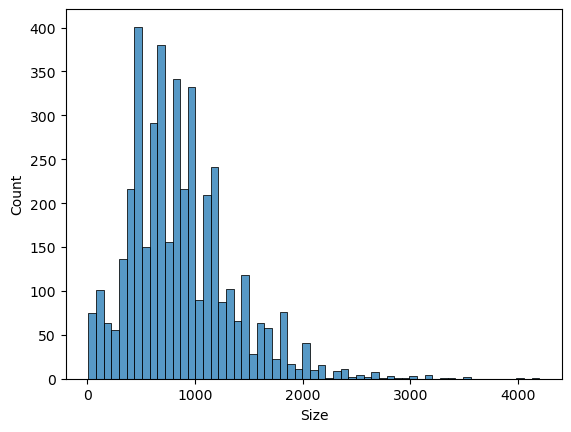

In [88]:
 #Checking The Size Column
print("\nChecking The Size Column")
sns.histplot(df['Size'])
plt.show()


Checking The BHK Column


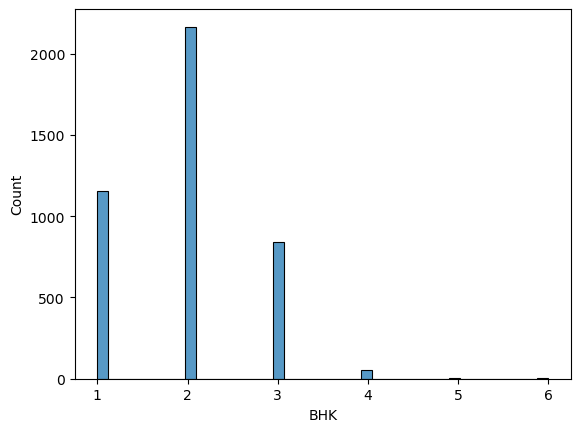

In [89]:
#Checking The Year BHK Column
print("\nChecking The BHK Column")
sns.histplot(df['BHK'])
plt.show()

separating the first variable x with just the features
and y with the label only

In [90]:
#Separating Features and Labels
X = df.drop('Rent', axis=1)
y = df['Rent'].astype(int)

scaling and labels conversion on the dataset using standardscaler,
onehotencoder, make_pipeline, make_column_selector and make_column_transformer.

In [91]:
#Scaling and Labels Conversion on The Dataset
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector,make_column_transformer

impute_start = SimpleImputer(strategy='most_frequent', 
add_indicator=True)
scaler = StandardScaler()
impute_finish = SimpleImputer(strategy='constant')
ohe = OneHotEncoder(handle_unknown='ignore')

kolom_start = make_column_selector(dtype_include='number')
kolom_finish = make_column_selector(dtype_exclude='number')

from sklearn.pipeline import make_pipeline
preprocessor = make_column_transformer((make_pipeline(impute_start,
scaler), kolom_start),
                                       
(make_pipeline(impute_finish, ohe), kolom_finish))

Preparing training, testing and validating Dataset.

In [92]:
#Preparing Training, Testing, And Validating Dataset
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y,
test_size=0.2, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full,
test_size=0.2, random_state=3)

Building machine learning model using linear regression

In [93]:
#Build A Machine Learning Model using linear regression
from sklearn.linear_model import LinearRegression
model_linreg = make_pipeline(preprocessor, LinearRegression())
model_linreg = model_linreg.fit(X_train, y_train)
y_pred_linreg = model_linreg.predict(X_test)

#Evaluating The Machine Learning Model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

#Mean Squared Error
mse = mean_squared_error(y_test, y_pred_linreg)
print('\nMean squared error Testing Set:', round(mse))

#Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_linreg)
print('Mean absolute error Testing Set:', round(mae))

#Root Mean Squared Error
rmse = np.sqrt(mse)
print('Root Mean Squared Error Testing Set:', round(rmse))

#calculating r2_score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_linreg)
print('R2_score for the  Testing Set:', r2_score(y_test, y_pred_linreg))


Mean squared error Testing Set: 70787029
Mean absolute error Testing Set: 5822
Root Mean Squared Error Testing Set: 8414
R2_score for the  Testing Set: 0.6378324955961676


Building machine learning model using decision tree regressor

In [94]:
#Build a Machine Learning Model DecisionTree
from sklearn.tree import DecisionTreeRegressor
model_dtr = make_pipeline(preprocessor, DecisionTreeRegressor(random_state=42))
model_dtr = model_dtr.fit(X_train, y_train)
y_pred_dtr = model_dtr.predict(X_test)

#Evaluating The Machine Learning Model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

#Mean Squared Error
mse = mean_squared_error(y_test, y_pred_dtr)
print('\nMean squared error Testing Set:', round(mse))

#Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_dtr)
print('Mean absolute error Testing Set:', round(mae))

#Root Mean Squared Error
rmse = np.sqrt(mse)
print('Root Mean Squared Error Testing Set:', round(rmse))

#calculating r2_score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_dtr)
print('R2_score for the Testing Set:', r2_score(y_test, y_pred_dtr))


Mean squared error Testing Set: 71368962
Mean absolute error Testing Set: 5499
Root Mean Squared Error Testing Set: 8448
R2_score for the Testing Set: 0.6348551518565622


Building a machine learning model using random forest regressor

In [95]:
#Build a Machine Learning Model RandomForest
from sklearn.ensemble import RandomForestRegressor
model_rfr = make_pipeline(preprocessor, RandomForestRegressor(random_state=42))
model_rfr = model_rfr.fit(X_train, y_train)
y_pred_rfr = model_rfr.predict(X_test)

#Evaluating The Machine Learning Model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

#Mean Squared Error
mse = mean_squared_error(y_test, y_pred_rfr)
print('\nMean squared error Testing Set:', round(mse))

#Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_dtr)
print('Mean absolute error Testing Set:', round(mae))

#Root Mean Squared Error
rmse = np.sqrt(mse)
print('Root Mean Squared Error Testing Set:', round(rmse))

#calculating r2_score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_rfr)
print('R2_score for the Testing Set:', r2_score(y_test, y_pred_rfr))


Mean squared error Testing Set: 50066608
Mean absolute error Testing Set: 5499
Root Mean Squared Error Testing Set: 7076
R2_score for the Testing Set: 0.7438443324637021


In [96]:
#Build a Machine Learning Model Knearest neighbor regressor
from sklearn.neighbors import KNeighborsRegressor
model_KN = make_pipeline(preprocessor, KNeighborsRegressor())
model_KN = model_KN.fit(X_train, y_train)
y_pred_KN = model_KN.predict(X_test)

#Evaluating The Machine Learning Model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

#Mean Squared Error
mse = mean_squared_error(y_test, y_pred_KN)
print('\nMean squared error Testing Set:', round(mse))

#Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_KN)
print('Mean absolute error Testing Set:', round(mae))

#Root Mean Squared Error
rmse = np.sqrt(mse)
print('Root Mean Squared Error Testing Set:', round(rmse))

#calculating r2_score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_KN)
print('R2_score for the Testing Set:', r2_score(y_test, y_pred_KN))


Mean squared error Testing Set: 52575869
Mean absolute error Testing Set: 4916
Root Mean Squared Error Testing Set: 7251
R2_score for the Testing Set: 0.7310062093987175


Evaluating the model
linear regression result :
Mean squared error Testing Set: 70787029
Mean absolute error Testing Set: 5822
Root Mean Squared Error Testing Set: 8414
R2_score for the  Testing Set: 0.6378324955961676

    
desicion tree regressor result:
Mean squared error Testing Set: 71368962
Mean absolute error Testing Set: 5499
Root Mean Squared Error Testing Set: 8448
R2_score for the Testing Set: 0.6348551518565622

    
Random forest regressor result:
Mean squared error Testing Set: 50066608
Mean absolute error Testing Set: 5499
Root Mean Squared Error Testing Set: 7076
R2_score for the Testing Set: 0.7438443324637021

Knearest neighbor regressor RESULT:
Mean squared error Testing Set: 52575869
Mean absolute error Testing Set: 4916
Root Mean Squared Error Testing Set: 7251
R2_score for the Testing Set: 0.7310062093987175



Visualization of the model

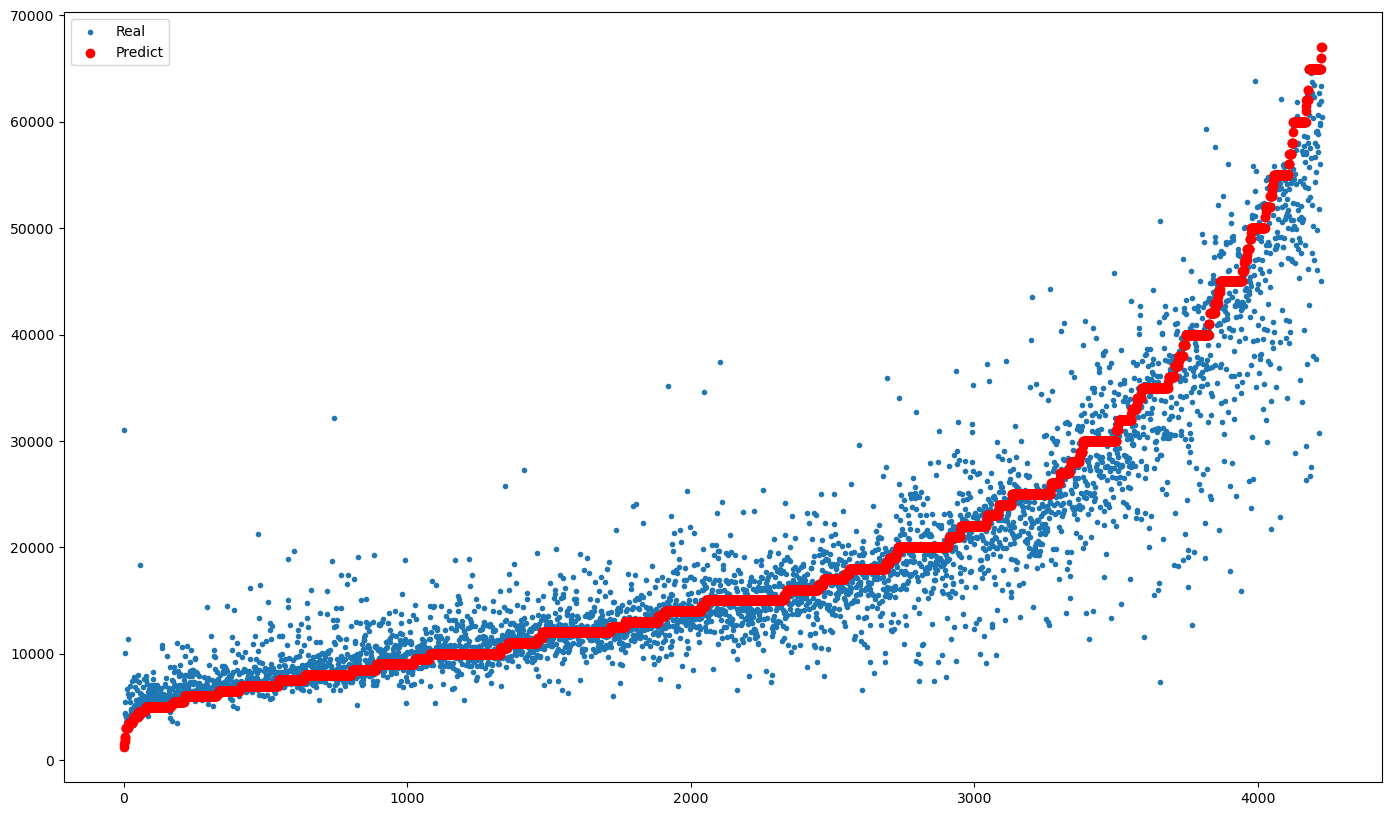

In [97]:
#Visualize The Machine Learning Model for random forest regressor
fig = plt.figure(figsize=(17, 10))
df = df.sort_values(by=['Rent'])
X = df.drop('Rent', axis=1)
y = df['Rent']
plt.scatter(range(X.shape[0]), model_rfr.predict(X), marker='.', 
label='Real')
plt.scatter(range(X.shape[0]), y, color='red', label='Predict')
plt.legend(loc='best', prop={'size': 10})
plt.show()

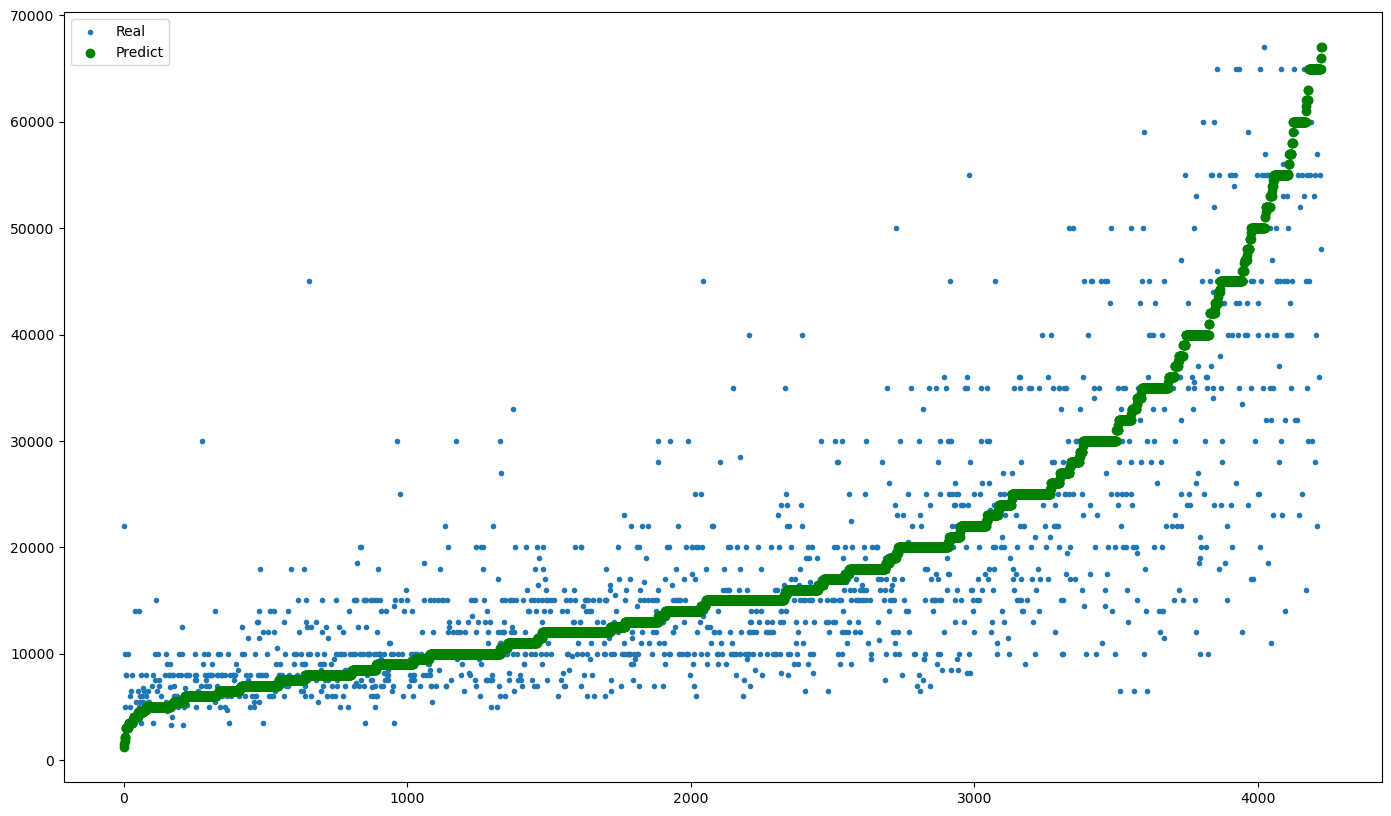

In [98]:
#Visualize The Machine Learning Model for decision tree regressor
fig = plt.figure(figsize=(17, 10))
df = df.sort_values(by=['Rent'])
X = df.drop('Rent', axis=1)
y = df['Rent']
plt.scatter(range(X.shape[0]), model_dtr.predict(X), marker='.', 
label='Real')
plt.scatter(range(X.shape[0]), y, color='green', label='Predict')
plt.legend(loc='best', prop={'size': 10})
plt.show()

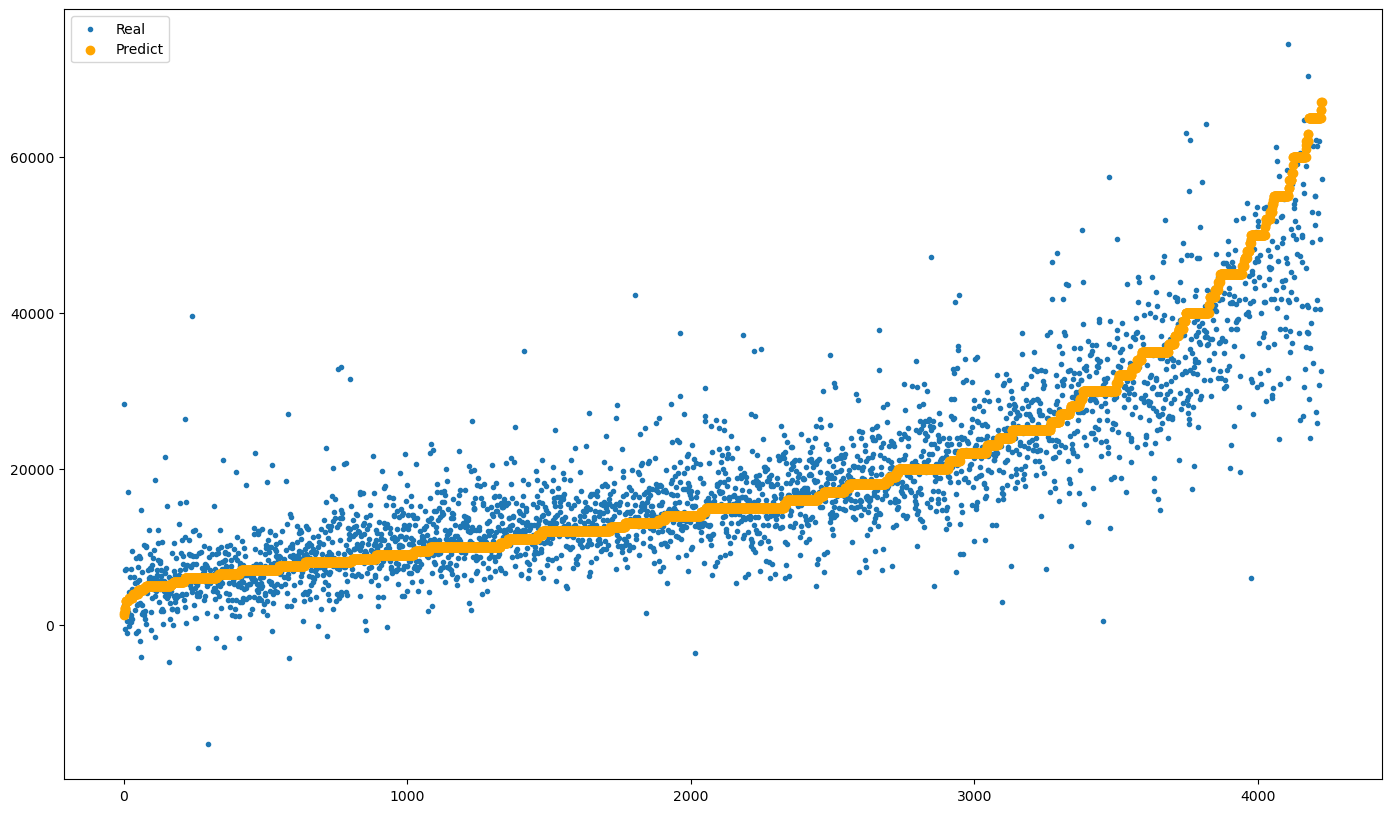

In [99]:
#Visualize The Machine Learning Model for linear regression
fig = plt.figure(figsize=(17, 10))
df = df.sort_values(by=['Rent'])
X = df.drop('Rent', axis=1)
y = df['Rent']
plt.scatter(range(X.shape[0]), model_linreg.predict(X), marker='.', 
label='Real')
plt.scatter(range(X.shape[0]), y, color='orange', label='Predict')
plt.legend(loc='best', prop={'size': 10})
plt.show()

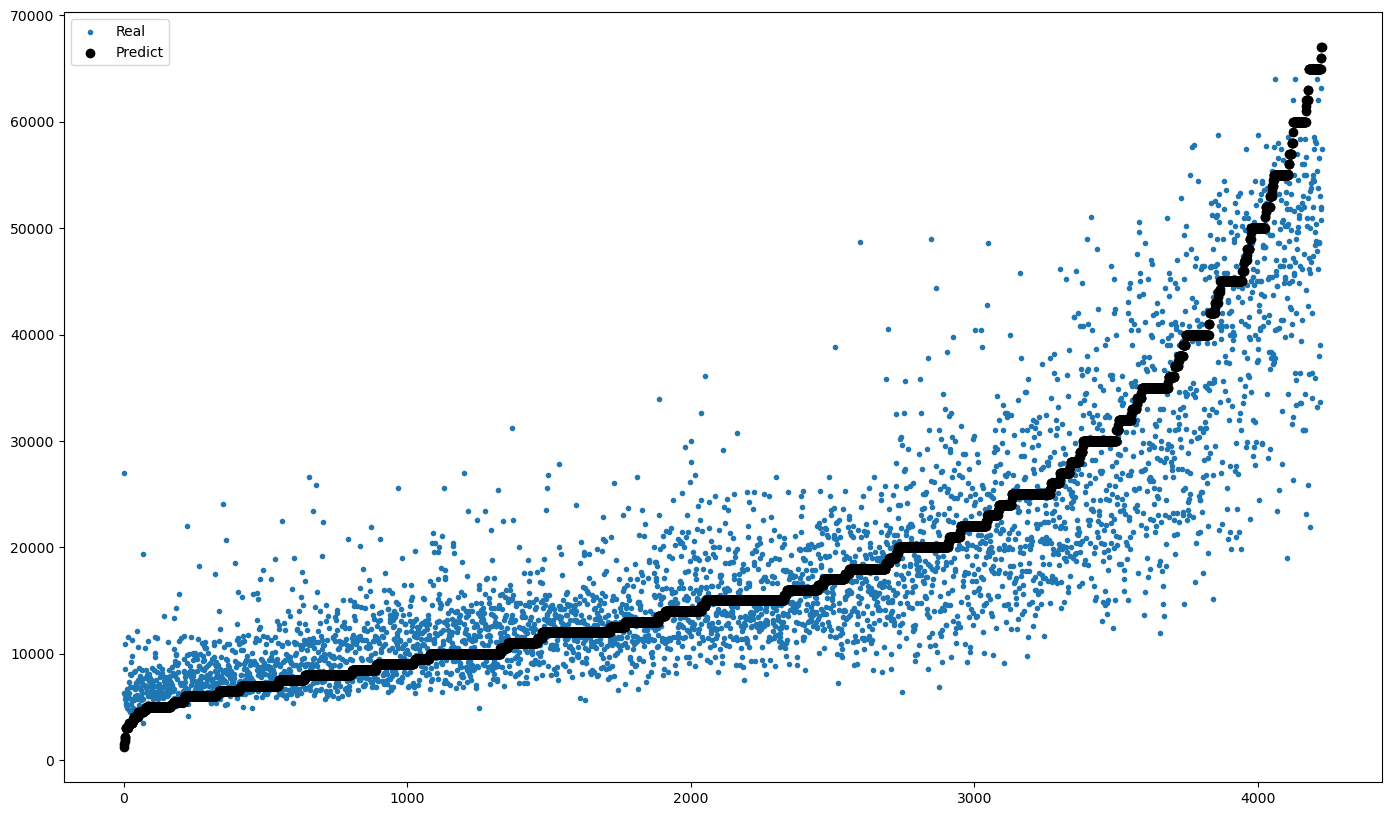

In [100]:
#Visualize The Machine Learning Model for knearest neighbor regression
fig = plt.figure(figsize=(17, 10))
df = df.sort_values(by=['Rent'])
X = df.drop('Rent', axis=1)
y = df['Rent']
plt.scatter(range(X.shape[0]), model_KN.predict(X), marker='.', 
label='Real')
plt.scatter(range(X.shape[0]), y, color='black', label='Predict')
plt.legend(loc='best', prop={'size': 10})
plt.show()

Validating The Machine Learning Model

In [101]:
#Validating The Machine Learning Model for random forest regressor
for i in range(5):
    real = y_val.iloc[i]
    pred = int(model_rfr.predict(X_val.iloc[i].to_frame().T)[0])
    print(f'Real Value ----->>>>> {real} $\n'
         f'Predicted Value ----->>>>> {pred} $')
    print()

Real Value ----->>>>> 8000 $
Predicted Value ----->>>>> 13352 $

Real Value ----->>>>> 23000 $
Predicted Value ----->>>>> 17190 $

Real Value ----->>>>> 32000 $
Predicted Value ----->>>>> 22980 $

Real Value ----->>>>> 8000 $
Predicted Value ----->>>>> 8694 $

Real Value ----->>>>> 9000 $
Predicted Value ----->>>>> 11240 $



In [102]:
#Validating The Machine Learning Model
for i in range(5):
    real = y_val.iloc[i]
    pred = int(model_dtr.predict(X_val.iloc[i].to_frame().T)[0])
    print(f'Real Value ----->>>>> {real} $\n'
         f'Predicted Value ----->>>>> {pred} $')
    print()
    

Real Value ----->>>>> 8000 $
Predicted Value ----->>>>> 15000 $

Real Value ----->>>>> 23000 $
Predicted Value ----->>>>> 18000 $

Real Value ----->>>>> 32000 $
Predicted Value ----->>>>> 20000 $

Real Value ----->>>>> 8000 $
Predicted Value ----->>>>> 10000 $

Real Value ----->>>>> 9000 $
Predicted Value ----->>>>> 9500 $



In [103]:
#Validating The Machine Learning Model
for i in range(5):
    real = y_val.iloc[i]
    pred = int(model_linreg.predict(X_val.iloc[i].to_frame().T)[0])
    print(f'Real Value ----->>>>> {real} $\n'
         f'Predicted Value ----->>>>> {pred} $')
    print()
    

Real Value ----->>>>> 8000 $
Predicted Value ----->>>>> 9030 $

Real Value ----->>>>> 23000 $
Predicted Value ----->>>>> 22134 $

Real Value ----->>>>> 32000 $
Predicted Value ----->>>>> 27972 $

Real Value ----->>>>> 8000 $
Predicted Value ----->>>>> 7411 $

Real Value ----->>>>> 9000 $
Predicted Value ----->>>>> 9981 $



In [104]:
#Validating The Machine Learning Model
for i in range(5):
    real = y_val.iloc[i]
    pred = int(model_KN.predict(X_val.iloc[i].to_frame().T)[0])
    print(f'Real Value ----->>>>> {real} $\n'
         f'Predicted Value ----->>>>> {pred} $')
    print()

Real Value ----->>>>> 8000 $
Predicted Value ----->>>>> 13400 $

Real Value ----->>>>> 23000 $
Predicted Value ----->>>>> 15100 $

Real Value ----->>>>> 32000 $
Predicted Value ----->>>>> 19800 $

Real Value ----->>>>> 8000 $
Predicted Value ----->>>>> 9500 $

Real Value ----->>>>> 9000 $
Predicted Value ----->>>>> 13900 $

